# Regresion Logistica desde cero

La regresion lineal esta basada en la ecuacion de una recta $y = b + wx$, y la regresion logistica sigue el mismo modelo. Dado que la regresion logistica se usa con propositos de clasificacion, normalmente las caracteristicas tienen mas de una dimension. Los grupos objetivo pueden ser binarios o multiclase. Ilustremos las explicaciones de regresion logistica usando los datos generados que se muestran en la siguiente figura. En este caso, la ecuacion puede ser escrita como $y(x)=b+w_1x_1+w_2x_2$. Los valores de $x_1$ se toman de la caracteristica 1 y los valores $x_2$ se toman de la caracteristica 2. La pendiente esta determinada por $W$, mientras que $b$ establece el offset (distancia vertical al eje x). La formalizacion de la regresion logistica normalmente se escribe como: $h(x)= theta_0 + theta_1x_1 + theta_2x_2 + ... + theta_nx_n$. y los parametros $b$ y $w_i$ pueden ser asociados al vector de parametros $\theta$. 

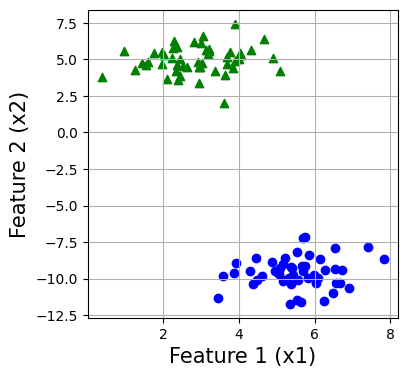

In [10]:
import matplotlib.pyplot as plt        
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=10)
plt.figure(figsize=(4,4))
for target, color, marker in zip(range(2), ['b', 'g'], ['o', '^']):
    plt.scatter(X[y==target, 0], X[y==target, 1], color=color, marker=marker,
                label='class {}'.format(target))
    plt.xlabel('Feature 1 (x1)', fontsize=15)
    plt.ylabel('Feature 2 (x2)', fontsize=15)
plt.grid(True)
plt.show()

Mientras quie la regresion lineal predice los valores $y$ usando el modelo de regresion, la clasificacion proporciona una etiqueta de clase. En nuestro ejemplo binario, la clasificacion debe devolver $h(x) = 0$: primera clase (muestras de puntos) o $h(x)=1$: segunda clase (muestra de triangulos). Para convertir los valores $y$ lineales a binarios $h(x)$, la regresion logistica usa alguna funcion tipo sigmoidal. El codigo Python que se muestra a continuacion dibuja la funcion sigmoidal: basicamente, esta funcion no lineal devuelve 0 cuando su entrada es menor que cero, y devuelve +1 cuando su entrada es mayor que cero. La pendiente de la funcion sigmoidal puede ser modifica. Resulta importante darse cuenta de que la funcion sigmoidal es derivable. 

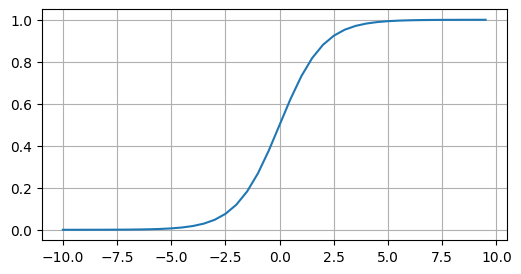

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(t):
    return 1.0 / (1.0 + np.exp(-t))

t = np.arange(-10, 10, 0.5)
y = sigmoid(t)
plt.figure(figsize=(6,3))
plt.plot(t, y)
plt.grid(True)
plt.show()

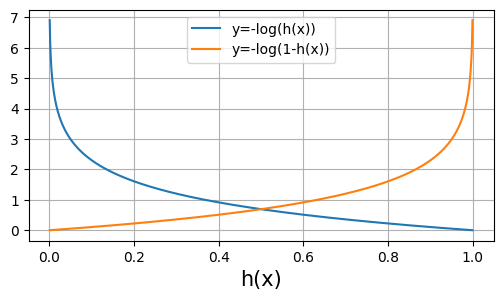

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def minus_log(t):
    return -np.log(t)

t = np.arange(0.001, 1, 0.001)
y1 = minus_log(t)
y2 = minus_log(1-t)
plt.figure(figsize=(6,3))
plt.plot(t, y1, label='y=-log(h(x))')
plt.plot(t, y2, label='y=-log(1-h(x))')
plt.xlabel('h(x)', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

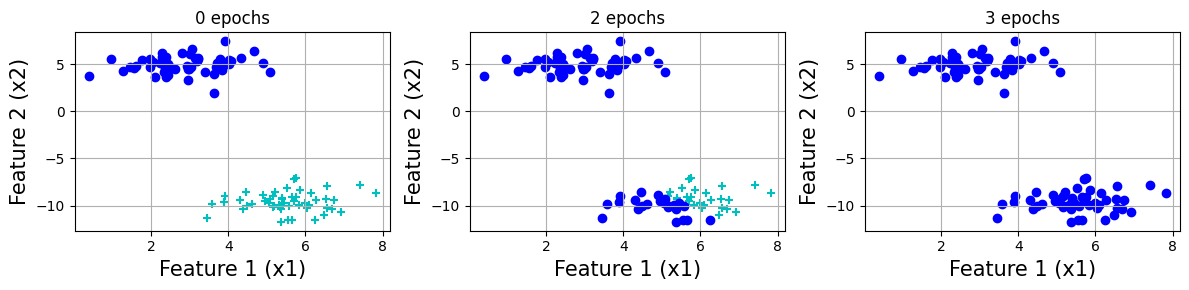

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(t):
    return 1.0 / (1.0 + np.exp(-t))

def prediction(theta, x):
    return theta[0]*theta[1]*x[0]+theta[2]*x[1]

def label(theta, x):
    return int(round(sigmoid(prediction(theta, x))))

def gradient(theta, x, y, j):
    sum = 0
    for i in range(X.shape[0]):
        if j==0:
            X_aux =  1 # intercept
        else:
            X_aux = X[i,j-1] # slope
        sum += (sigmoid(prediction(theta, X[i])) - y[i]) * X_aux
    return sum/X.shape[0]

def fit(theta, X, y, epochs):
    for e in range(epochs):
        for j in range(len(theta)):
            theta[j] -= gradient(theta, X, y, j)
    return theta

X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=10)

fig, axs = plt.subplots(1, 3, figsize=(12,3))
theta_0 = [8.7, 9.1, 6.4]
# A figure for eac number of epochs model
for i, ax in zip([0,2,3], axs):
    theta = fit(theta_0, X, y, i) # fit the model using i epochs
    label_y = []
    for row in range(len(y)):
        label_y.append(label(theta, X[row])) # labeled results vector
    # incorrect labeled samples
    ax.scatter(X[y!=label_y, 0], X[y!=label_y, 1], c='c', marker='+')
    # correct labeled samples
    ax.scatter(X[y==label_y, 0], X[y==label_y, 1], c='b', marker='o')
    ax.set_title(format(i)+' epochs')
    ax.set_xlabel('Feature 1 (x1)', fontsize=15)
    ax.set_ylabel('Feature 2 (x2)', fontsize=15)
    ax.grid(True)
    
plt.tight_layout()

plt.show()
    

In [11]:
import numpy as np
from sklearn.datasets import make_blobs

# Generamos datos de clasificación binaria
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

# Guardamos los datos en un archivo CSV
np.savetxt("data.csv", np.column_stack((X, y)), delimiter=",", header="x1,x2,y", comments="")
